In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import streamlit as st
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.sparse import csr_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Bollywood songs.csv')
df

,Unnamed: 0,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,1,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",BollywoodDance,Simmba,8.8/10
1,2,Coca Cola,"Neha Kakkar, Tony Kakkar",BollywoodDanceRomantic,Luka Chuppi,9.0/10
2,3,Apna Time Aayega,Ranveer Singh,BollywoodDance,Gully Boy,9.7/10
3,4,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",BollywoodDance,Total Dhamaal,9.1/10
4,5,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",BollywoodRomantic,Simmba,9.2/10
...,...,...,...,...,...,...
2415,2416,Jana Tumhare Pyar Mein,Mukesh,BollywoodDance,Sasural,10-Oct
2416,2417,Tum Jaise Bigde Babu Se,Lata Mangeshkar,BollywoodDance,Jab Pyar Kisi Se Hota Hai,10-Oct
2417,2418,O Yaad Nahi Bhool Gaya,"Lata Mangeshkar, Suresh Wadkar",BollywoodDance,Lamhe,10-Oct
2418,2419,Ladi Re Ladi Tujhse Aankh Jo Ladi,Jagjit Kaur,BollywoodDance,Shola Aur Shabnam,10-Oct


In [3]:
df = df.iloc[: , 1:]

In [4]:
df

,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",BollywoodDance,Simmba,8.8/10
1,Coca Cola,"Neha Kakkar, Tony Kakkar",BollywoodDanceRomantic,Luka Chuppi,9.0/10
2,Apna Time Aayega,Ranveer Singh,BollywoodDance,Gully Boy,9.7/10
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",BollywoodDance,Total Dhamaal,9.1/10
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",BollywoodRomantic,Simmba,9.2/10
...,...,...,...,...,...
2415,Jana Tumhare Pyar Mein,Mukesh,BollywoodDance,Sasural,10-Oct
2416,Tum Jaise Bigde Babu Se,Lata Mangeshkar,BollywoodDance,Jab Pyar Kisi Se Hota Hai,10-Oct
2417,O Yaad Nahi Bhool Gaya,"Lata Mangeshkar, Suresh Wadkar",BollywoodDance,Lamhe,10-Oct
2418,Ladi Re Ladi Tujhse Aankh Jo Ladi,Jagjit Kaur,BollywoodDance,Shola Aur Shabnam,10-Oct


In [5]:
df.rename(columns={'Song-Name' : 'songs',
                        'Singer/Artists':'Singer',
                        'Album/Movie':'Album',
                        'User-Rating':'Ratings'}, inplace=True)
df

,songs,Singer,Genre,Album,Ratings
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",BollywoodDance,Simmba,8.8/10
1,Coca Cola,"Neha Kakkar, Tony Kakkar",BollywoodDanceRomantic,Luka Chuppi,9.0/10
2,Apna Time Aayega,Ranveer Singh,BollywoodDance,Gully Boy,9.7/10
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",BollywoodDance,Total Dhamaal,9.1/10
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",BollywoodRomantic,Simmba,9.2/10
...,...,...,...,...,...
2415,Jana Tumhare Pyar Mein,Mukesh,BollywoodDance,Sasural,10-Oct
2416,Tum Jaise Bigde Babu Se,Lata Mangeshkar,BollywoodDance,Jab Pyar Kisi Se Hota Hai,10-Oct
2417,O Yaad Nahi Bhool Gaya,"Lata Mangeshkar, Suresh Wadkar",BollywoodDance,Lamhe,10-Oct
2418,Ladi Re Ladi Tujhse Aankh Jo Ladi,Jagjit Kaur,BollywoodDance,Shola Aur Shabnam,10-Oct


In [6]:
df['Genre'] = df['Genre'].apply(lambda x:x.replace("Bollywood"," "))
df['Ratings'] =df['Ratings'].apply(lambda x:x.replace("/10"," "))

In [7]:
df

,songs,Singer,Genre,Album,Ratings
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",Dance,Simmba,8.8
1,Coca Cola,"Neha Kakkar, Tony Kakkar",DanceRomantic,Luka Chuppi,9.0
2,Apna Time Aayega,Ranveer Singh,Dance,Gully Boy,9.7
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",Dance,Total Dhamaal,9.1
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",Romantic,Simmba,9.2
...,...,...,...,...,...
2415,Jana Tumhare Pyar Mein,Mukesh,Dance,Sasural,10-Oct
2416,Tum Jaise Bigde Babu Se,Lata Mangeshkar,Dance,Jab Pyar Kisi Se Hota Hai,10-Oct
2417,O Yaad Nahi Bhool Gaya,"Lata Mangeshkar, Suresh Wadkar",Dance,Lamhe,10-Oct
2418,Ladi Re Ladi Tujhse Aankh Jo Ladi,Jagjit Kaur,Dance,Shola Aur Shabnam,10-Oct


In [8]:
df.shape

(2420, 5)

In [9]:
#df.info()

In [10]:
df.isna().sum()

songs       0
Singer     10
Genre       0
Album       3
Ratings     0
dtype: int64

In [11]:
df.Ratings.unique()

array(['8.8 ', '9.0 ', '9.7 ', '9.1 ', '9.2 ', '9.5 ', '9.6 ', '8.4 ',
       '8.6 ', '9.4 ', '8.7 ', '9.3 ', '8.5 ', '8.9 ', '8.1 ', '7.7 ',
       '9.8 ', '6.8 ', '8.2 ', '9.9 ', '8.3 ', '7.2 ', '7.6 ', '7.5 ',
       '7.9 ', '7.3 ', '7.4 ', '7.8 ', '8.0 ', '7.0 ', '7.1 ', '6.9 ',
       '6.3 ', '5.8 ', '6.4 ', '10-Oct', '09-Oct', '6.6 '], dtype=object)

In [12]:
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')

In [13]:
mean_value = df.Ratings.mean()
mean_value

9.073826339842098

In [14]:
df.Ratings.fillna(value = mean_value, inplace=True)
df

,songs,Singer,Genre,Album,Ratings
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",Dance,Simmba,8.800000
1,Coca Cola,"Neha Kakkar, Tony Kakkar",DanceRomantic,Luka Chuppi,9.000000
2,Apna Time Aayega,Ranveer Singh,Dance,Gully Boy,9.700000
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",Dance,Total Dhamaal,9.100000
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",Romantic,Simmba,9.200000
...,...,...,...,...,...
2415,Jana Tumhare Pyar Mein,Mukesh,Dance,Sasural,9.073826
2416,Tum Jaise Bigde Babu Se,Lata Mangeshkar,Dance,Jab Pyar Kisi Se Hota Hai,9.073826
2417,O Yaad Nahi Bhool Gaya,"Lata Mangeshkar, Suresh Wadkar",Dance,Lamhe,9.073826
2418,Ladi Re Ladi Tujhse Aankh Jo Ladi,Jagjit Kaur,Dance,Shola Aur Shabnam,9.073826


In [15]:
print('Minimum rating is: ' ,(df.Ratings.min()))
print('Maximum rating is: ' ,(df.Ratings.max()))

Minimum rating is:  5.8
Maximum rating is:  9.9


In [16]:
df.dtypes

songs       object
Singer      object
Genre       object
Album       object
Ratings    float64
dtype: object

In [17]:
df[df.duplicated()].shape

(16, 5)

In [18]:
df[df.duplicated()]

,songs,Singer,Genre,Album,Ratings
221,Naam Hai Bhaiaji,"Amit Mishra, Raftaar",,Bhaiaji Superhit,9.4
243,Kudiya Shehar Diyan,"Daler Mehndi, Neha Kakkar",Dance,Poster Boys,9.0
354,Chaar Botal Vodka,Yo Yo Honey Singh,Dance,Ragini MMS 2,8.8
946,Chookar Mere Man Ko,Kishore Kumar,Romantic,Yaarana,9.3
958,It’s Magic,Taz,Dance,Koi Mil Gaya,8.8
960,Nikamma,Rahat Fateh Ali Khan,,3 Dev,9.4
978,Rangdaari,"Arko, Navraj Hans",Sad,Daas Dev,9.4
1140,Rani Tu Mein Raja (,"Bhavya Pandit, Mika Singh, Yo Yo Honey Singh",Dance,Son of Sardaar,8.3
1173,Mar Jaawan Mit Jaawan,"Abhijeet Sawant, Sunidhi Chauhan",Dance,Aashiq Banaya Aapne,9.0
1221,Tu Kamaal Di Kudi,"Mamta Sharma, Vineet Singh",Dance,Son of Sardaar,8.5


In [19]:
df1 = df.drop_duplicates()
df1

,songs,Singer,Genre,Album,Ratings
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",Dance,Simmba,8.800000
1,Coca Cola,"Neha Kakkar, Tony Kakkar",DanceRomantic,Luka Chuppi,9.000000
2,Apna Time Aayega,Ranveer Singh,Dance,Gully Boy,9.700000
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",Dance,Total Dhamaal,9.100000
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",Romantic,Simmba,9.200000
...,...,...,...,...,...
2415,Jana Tumhare Pyar Mein,Mukesh,Dance,Sasural,9.073826
2416,Tum Jaise Bigde Babu Se,Lata Mangeshkar,Dance,Jab Pyar Kisi Se Hota Hai,9.073826
2417,O Yaad Nahi Bhool Gaya,"Lata Mangeshkar, Suresh Wadkar",Dance,Lamhe,9.073826
2418,Ladi Re Ladi Tujhse Aankh Jo Ladi,Jagjit Kaur,Dance,Shola Aur Shabnam,9.073826


In [20]:
df1.shape

(2404, 5)

<AxesSubplot:>

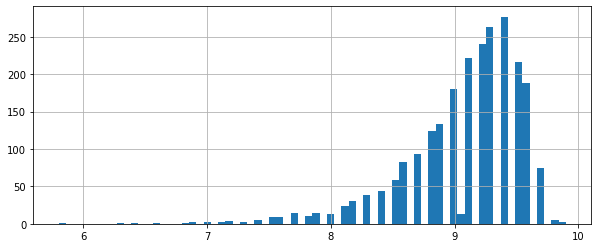

In [21]:
# Check the distribution of the rating
plt.figure(figsize=(10,4))
df1['Ratings'].hist(bins=70)

In [22]:
#count how many rows we have by song, we show only the ten more popular songs 
ten_pop_songs = df1.groupby('Album')['Ratings'].count().reset_index().sort_values(['Ratings', 'Album'], ascending = [0,1])
ten_pop_songs['percentage']  = round(ten_pop_songs['Ratings'].div(ten_pop_songs['Ratings'].sum())*100, 2)

In [23]:
ten_pop_songs= ten_pop_songs[:10]
ten_pop_songs

,Album,Ratings,percentage
103,Bajirao Mastani,10,0.42
166,Chaudhvin Ka Chand,9,0.37
202,Devdas,9,0.37
236,Dilwale,9,0.37
297,Goliyon Ki Rasleela Ram-leela,9,0.37
582,Mughal-E-Azam,9,0.37
887,Yeh Jawaani Hai Deewani,9,0.37
104,Bajrangi Bhaijaan,8,0.33
231,Dil To Pagal Hai,8,0.33
257,Ek Paheli Leela,8,0.33


In [24]:
labels = ten_pop_songs['Album'].tolist()
counts = ten_pop_songs['Ratings'].tolist()

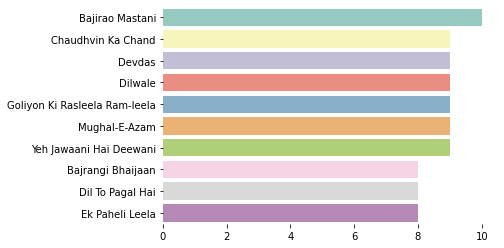

In [25]:
plt.figure()
sns.barplot(x=counts, y=labels, palette='Set3')
sns.despine(left=True, bottom=True)

In [26]:
#count how many rows we have by artist name, we show only the ten more popular artist singer
ten_pop_artists  = df1.groupby(['Singer'])['Album'].count().reset_index().sort_values(['Album', 'Singer'], 
                                                                                                ascending = [0,1])

In [27]:
ten_pop_artists = ten_pop_artists[:10]
ten_pop_artists

,Singer,Album
923,Mohammed Rafi,55
831,Lata Mangeshkar,51
165,"Alka Yagnik, Kumar Sanu",47
324,Arijit Singh,44
949,Mukesh,36
183,"Alka Yagnik, Udit Narayan",34
1183,Sunidhi Chauhan,32
389,Asha Bhosle,31
413,Atif Aslam,28
796,Kishore Kumar,27


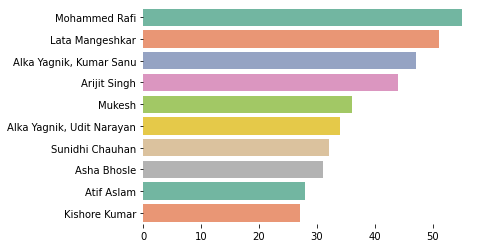

In [28]:
plt.figure()
labels = ten_pop_artists['Singer'].tolist()
counts = ten_pop_artists['Album'].tolist()
sns.barplot(x=counts, y=labels, palette='Set2')
sns.despine(left=True, bottom=True)

In [29]:
df1.head()

,songs,Singer,Genre,Album,Ratings
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",Dance,Simmba,8.8
1,Coca Cola,"Neha Kakkar, Tony Kakkar",DanceRomantic,Luka Chuppi,9.0
2,Apna Time Aayega,Ranveer Singh,Dance,Gully Boy,9.7
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",Dance,Total Dhamaal,9.1
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",Romantic,Simmba,9.2


In [30]:
df1.shape

(2404, 5)

In [31]:
df1.Genre.value_counts()

 Dance                         1218
 Romantic                       598
 Sad                            296
                                100
 DanceRomantic                   53
 RomanticSad                     29
 Devotional                      25
 Patriotic                       20
 Motivational                    19
 Romance                         14
 RomanticSensual                  8
 Sensual                          7
 DanceSad                         4
 DancePatriotic                   3
 RomanticSadSensual               2
 MotivationalPatriotic            2
 DanceSensual                     2
 DevotionalSad                    1
 DanceMotivationalPatriotic       1
 DanceRomance                     1
 PatrioticSad                     1
Name: Genre, dtype: int64

In [32]:
df_songs_features = df1.pivot_table(index='songs', columns='Genre', values='Ratings').fillna(0)
df_songs_features

Genre,,Dance,DanceMotivationalPatriotic,DancePatriotic,DanceRomance,DanceRomantic,DanceSad,DanceSensual,Devotional,DevotionalSad,...,MotivationalPatriotic,Patriotic,PatrioticSad,Romance,Romantic,RomanticSad,RomanticSadSensual,RomanticSensual,Sad,Sensual
songs,,,,,,,,,,,,,,,,,,,,,
20-20,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
440 Volt,0.0,8.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A B C D E F G H,0.0,7.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Flying Jatt,0.0,8.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABCD,0.0,9.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoobi Doobi,0.0,0.0,0.0,0.0,0.0,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zor Ka Jhatka,0.0,9.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zor Ka Jhatka Haye (Remix),0.0,9.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X = csr_matrix(df_songs_features.values)

In [34]:
df1.head()

,songs,Singer,Genre,Album,Ratings
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",Dance,Simmba,8.8
1,Coca Cola,"Neha Kakkar, Tony Kakkar",DanceRomantic,Luka Chuppi,9.0
2,Apna Time Aayega,Ranveer Singh,Dance,Gully Boy,9.7
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",Dance,Total Dhamaal,9.1
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",Romantic,Simmba,9.2


In [35]:
num = len(df1['songs'].unique())
song_mapper = dict(zip(np.unique(df1["songs"]), list(range(num))))

In [36]:
song_inv_mapper = dict(zip(list(range(num)), np.unique(df1["songs"])))

In [37]:
def find_similar_songs(new_song, X, k, metric='cosine', show_distance=False):
    neighbour_ids = []
    song_ind = song_mapper[new_song]
    song_vec = X[song_ind]
    k+=1    
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
    kNN.fit(X)
    song_vec = song_vec.reshape(1,-1)
    neighbour = kNN.kneighbors(song_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(song_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [38]:
find_similar_songs(new_song='Aankh Marey',X=X, k=10)

['Swag Se Swagat',
 'Mera Yaar Bana Hai Dulha',
 'I Don’t Luv U',
 'I Am A Disco Dancer',
 'Huzur Is Kadar',
 'Husn Parcham',
 'Humne Pee Rakhi Hai',
 'Suraiyya',
 'Swag Saha Nahi Jaye',
 'Swag Se Swagat (Arabic)']

In [39]:
find_similar_songs(new_song='Coca Cola',X=X, k=10)

['Mere Samne Wali Khidki Mein',
 'Mere Sapno Ki Rani',
 'Tum Tak',
 'Aaj Unse Milna Hai',
 'Pak Chik Pak',
 'Palat Tera Hero Idhar Hai',
 'Gulabi Aankhen',
 'Badan Pe Sitaare',
 'Love You Till The End',
 'Allah Maaf Kare']